# IMPORT MODULES & LOAD DATA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Dataset: Real State.csv

Source: Metros Cubicos
Date: September 22 2020

Description: Measurements are related to M2 of Terrain, M2 of Construction, and Price of Property

* Variables/Columns
* PRICE: Price of Property
* SQUARED_METERS: Squared Meters of Property Terrain
* BUILD_SQUARED_METERS: Squared Meters of build property

**Hypothesis**: Can we predict the price from Metros Cubicos CDMX Dataset using the measurements of Squared Meters?

In [6]:
# Read the csv file into a pandas DataFrame

realestate = pd.read_csv('MTY20_Reat_State.csv')
realestate.head()

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,price
0,666625211,29,25.775692,-100.24225,3,3.0,124.0,210.0,La casa se encuentra en excelentes condiciones...,"Residencial Los Pinos, San Nicolás De Los Garz...",2080000.0
1,666625212,28,25.778525,-100.31108,2,2.0,118.0,170.0,EXCELENTE OPORTUNIDAD PARA INVERTIR EN LA MEJO...,"Residencial Pinos, General Escobedo, Nuevo León",1850000.0
2,666625214,30,25.801032,-100.58610,3,2.0,133.0,162.0,Hermosa casa con ubicación privilegiada frente...,"García, Nuevo León",2200000.0
3,666625221,28,25.793114,-100.35040,3,2.0,105.0,152.0,"Hermosa casa en Fraccionamiento Privado, muy c...","Pedregal De San Agustín, General Escobedo, Nue...",1350000.0
4,666625227,27,25.736270,-100.15660,3,2.0,175.0,95.0,"Casa en venta con excelente ubicación, cerca d...","Villas De San Carlos Iis 3e, Apodaca, Nuevo León",950000.0


# EXPLORE AND CLEAN DATA FOR NULLS

In [7]:
#Describe Data
realestate.describe()

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,price
count,3.607000e+03,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3.607000e+03
mean,7.934702e+08,28.481564,25.689684,-100.312720,3.245911,3.098420,307.859459,322.498447,7.682567e+06
std,3.058880e+07,3.532533,0.268456,0.334674,0.874688,1.450282,411.121863,248.770614,1.013937e+07
min,6.666252e+08,25.000000,19.064888,-118.521400,1.000000,1.000000,44.000000,32.000000,2.690000e+05
25%,7.817918e+08,25.000000,25.642955,-100.384100,3.000000,2.000000,126.000000,170.000000,2.100000e+06
50%,7.967890e+08,27.000000,25.686742,-100.287700,3.000000,3.000000,180.000000,260.000000,3.850000e+06
75%,8.167717e+08,30.000000,25.754103,-100.230500,3.000000,4.000000,344.500000,405.000000,9.000000e+06
max,8.231977e+08,36.000000,36.407213,-98.226420,15.000000,12.000000,7000.000000,4400.000000,1.800000e+08


In [8]:
# Shape the dataframe
realestate.shape

(3607, 11)

In [9]:
#Describing Types
realestate.dtypes

id_publicacion              int64
id_city                     int64
house_lat                 float64
house_long                float64
rooms                       int64
bathrooms                 float64
squared_meters            float64
builded_squared_meters    float64
house_details              object
address                    object
price                     float64
dtype: object

In [10]:
#Count to identify Nulls
realestate.count()

id_publicacion            3607
id_city                   3607
house_lat                 3607
house_long                3607
rooms                     3607
bathrooms                 3607
squared_meters            3607
builded_squared_meters    3607
house_details             3606
address                   3607
price                     3607
dtype: int64

In [11]:
#Clean Dataframe
realestate_no_null = realestate.dropna()

In [12]:
#Print Dataframe
realestate_no_null.count()

id_publicacion            3606
id_city                   3606
house_lat                 3606
house_long                3606
rooms                     3606
bathrooms                 3606
squared_meters            3606
builded_squared_meters    3606
house_details             3606
address                   3606
price                     3606
dtype: int64

### PLOT LINEAR REGRESSION

In [13]:
#Define variables
x1 = realestate_no_null["builded_squared_meters"]
y1 = realestate_no_null["price"]

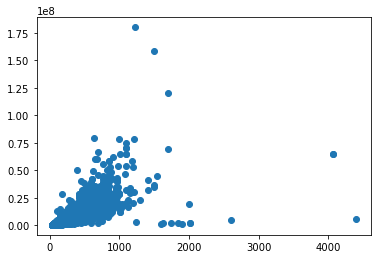

In [14]:
plt.scatter(x1, y1)

# EXTENSIVE DATA CLEANSING
After seen the poor linear regresion on original data

## Create an INDEX with build_squared_meters/price

In [15]:
realestate_no_null['index'] = realestate_no_null.price / realestate_no_null.builded_squared_meters

<ipython-input-15-5821cfa17f77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realestate_no_null['index'] = realestate_no_null.price / realestate_no_null.builded_squared_meters


In [16]:
realestate_no_null.count()

id_publicacion            3606
id_city                   3606
house_lat                 3606
house_long                3606
rooms                     3606
bathrooms                 3606
squared_meters            3606
builded_squared_meters    3606
house_details             3606
address                   3606
price                     3606
index                     3606
dtype: int64

In [17]:
pd.options.display.max_rows

60

In [18]:
realestate_no_null.head()

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,price,index
0,666625211,29,25.775692,-100.24225,3,3.0,124.0,210.0,La casa se encuentra en excelentes condiciones...,"Residencial Los Pinos, San Nicolás De Los Garz...",2080000.0,9904.761905
1,666625212,28,25.778525,-100.31108,2,2.0,118.0,170.0,EXCELENTE OPORTUNIDAD PARA INVERTIR EN LA MEJO...,"Residencial Pinos, General Escobedo, Nuevo León",1850000.0,10882.352941
2,666625214,30,25.801032,-100.58610,3,2.0,133.0,162.0,Hermosa casa con ubicación privilegiada frente...,"García, Nuevo León",2200000.0,13580.246914
3,666625221,28,25.793114,-100.35040,3,2.0,105.0,152.0,"Hermosa casa en Fraccionamiento Privado, muy c...","Pedregal De San Agustín, General Escobedo, Nue...",1350000.0,8881.578947
4,666625227,27,25.736270,-100.15660,3,2.0,175.0,95.0,"Casa en venta con excelente ubicación, cerca d...","Villas De San Carlos Iis 3e, Apodaca, Nuevo León",950000.0,10000.000000


## Optimizing Data

In [19]:
#Data Cleansing with values < 50 squared meters
is_m2 =  realestate_no_null['builded_squared_meters']>=50
is_m2

0       True
1       True
2       True
3       True
4       True
        ... 
3602    True
3603    True
3604    True
3605    True
3606    True
Name: builded_squared_meters, Length: 3606, dtype: bool

In [20]:
realestate_clean = realestate_no_null[is_m2]
realestate_clean.shape

(3580, 12)

In [21]:
#Data Cleansing with values above $300,000,000 MXN
is_price =  realestate_no_null['price']<=300000000
is_price

0       True
1       True
2       True
3       True
4       True
        ... 
3602    True
3603    True
3604    True
3605    True
3606    True
Name: price, Length: 3606, dtype: bool

In [22]:
realestate_clean01 = realestate_clean[is_price]
realestate_clean01.shape

<ipython-input-22-42ec8eaff75f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  realestate_clean01 = realestate_clean[is_price]


(3580, 12)

## CLEAN DATA BASE ON INDEX

In [23]:
realestate_clean01.describe()

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,price,index
count,3.580000e+03,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3.580000e+03,3580.000000
mean,7.935120e+08,28.472346,25.691091,-100.312966,3.257821,3.113966,309.438567,324.596620,7.736760e+06,19802.552031
std,3.052579e+07,3.539908,0.245514,0.333702,0.865829,1.444513,412.257575,248.524544,1.015821e+07,12723.292808
min,6.666252e+08,25.000000,25.353708,-118.521400,1.000000,1.000000,44.000000,50.000000,2.800000e+05,462.670873
25%,7.817918e+08,25.000000,25.642927,-100.383225,3.000000,2.000000,126.000000,173.000000,2.150000e+06,11771.821632
50%,7.968447e+08,27.000000,25.686614,-100.286800,3.000000,3.000000,183.000000,261.000000,3.900000e+06,16071.428571
75%,8.169410e+08,30.000000,25.753080,-100.230500,3.000000,4.000000,347.000000,408.000000,9.212500e+06,23767.733211
max,8.231977e+08,36.000000,36.407213,-99.978910,15.000000,12.000000,7000.000000,4400.000000,1.800000e+08,153846.153846


In [24]:
realestate_clean01['index'].describe()

count      3580.000000
mean      19802.552031
std       12723.292808
min         462.670873
25%       11771.821632
50%       16071.428571
75%       23767.733211
max      153846.153846
Name: index, dtype: float64

In [25]:
#Data Cleansing with Index > number
is_index_high =  realestate_clean01['index']<=100000
is_index_high

0       True
1       True
2       True
3       True
4       True
        ... 
3602    True
3603    True
3604    True
3605    True
3606    True
Name: index, Length: 3580, dtype: bool

In [26]:
realestate_clean02 = realestate_clean01[is_index_high]
realestate_clean02.shape

(3574, 12)

In [27]:
#Data Cleansing with Index < number
is_index_low =  realestate_clean02['index']>=1000
is_index_low

0       True
1       True
2       True
3       True
4       True
        ... 
3602    True
3603    True
3604    True
3605    True
3606    True
Name: index, Length: 3574, dtype: bool

In [28]:
realestate_clean02b = realestate_clean02[is_index_low]
realestate_clean02b.shape

(3572, 12)

## REMOVE PROPERTIES CATALOGUED AS "REMATE BANCARIO"

In [29]:
realestate_clean03 = realestate_clean02[realestate_clean02['house_details'].str.contains("remate bancario", 
                                                                                         "REMATES BANCARIOS")]

In [30]:
realestate_clean04 = realestate_clean02[realestate_clean02['house_details'].str.contains("remates bancarios", 
                                                                                         "REMATE BANCARIO")]

In [31]:
list_clean01 = realestate_clean03['id_publicacion'].to_list()
len(list_clean01)

0

In [32]:
list_clean02 = realestate_clean04['id_publicacion'].to_list()
len(list_clean02)

0

In [33]:
new_clean01 = realestate_clean02[~realestate_clean02.id_publicacion.isin(list_clean01)]
new_clean02 = new_clean01[~new_clean01.id_publicacion.isin(list_clean02)]
new_clean02

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,price,index
0,666625211,29,25.775692,-100.24225,3,3.0,124.0,210.0,La casa se encuentra en excelentes condiciones...,"Residencial Los Pinos, San Nicolás De Los Garz...",2080000.0,9904.761905
1,666625212,28,25.778525,-100.31108,2,2.0,118.0,170.0,EXCELENTE OPORTUNIDAD PARA INVERTIR EN LA MEJO...,"Residencial Pinos, General Escobedo, Nuevo León",1850000.0,10882.352941
2,666625214,30,25.801032,-100.58610,3,2.0,133.0,162.0,Hermosa casa con ubicación privilegiada frente...,"García, Nuevo León",2200000.0,13580.246914
3,666625221,28,25.793114,-100.35040,3,2.0,105.0,152.0,"Hermosa casa en Fraccionamiento Privado, muy c...","Pedregal De San Agustín, General Escobedo, Nue...",1350000.0,8881.578947
4,666625227,27,25.736270,-100.15660,3,2.0,175.0,95.0,"Casa en venta con excelente ubicación, cerca d...","Villas De San Carlos Iis 3e, Apodaca, Nuevo León",950000.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3602,823115203,34,25.656484,-100.36940,4,6.0,400.0,528.0,Casa Los Ríos - ID: DV9935Residencia para estr...,"Del Valle, San Pedro Garza García, Nuevo León",34000000.0,64393.939394
3603,823115252,25,25.577001,-100.23620,3,3.0,231.0,300.0,Casa de 2 pisos Planta baja: cochera para 3 ca...,"Vistancia, Monterrey, Nuevo León",5800000.0,19333.333333
3604,823115262,25,25.748839,-100.38170,3,4.0,300.0,471.0,Ubicada en la parte alta de paseo de los leone...,"Las Cumbres, Monterrey, Nuevo León",6900000.0,14649.681529
3605,823160348,26,25.690444,-100.21020,2,1.0,122.0,98.0,CASA EN VENTA EN GUADALUPE N.L. \n \nCasa en v...,Casa En Venta En Guadalupe N.l. Colonia Las Qu...,950000.0,9693.877551


## REMOVE PROPERTIES CATALOGUED AS "RENTA"

In [34]:
realestate_clean05 = new_clean02[new_clean02['house_details'].str.contains("RENTA", "renta")]

In [35]:
list_clean03 = realestate_clean05['id_publicacion'].to_list()
len(list_clean03)

19

In [36]:
realestate_clean06 = new_clean02[new_clean02['house_details'].str.contains("Renta")]

In [37]:
list_clean04 = realestate_clean06['id_publicacion'].to_list()
len(list_clean04)

18

In [38]:
new_clean03 = new_clean02[~new_clean02.id_publicacion.isin(list_clean03)]
new_clean04 = new_clean03[~new_clean03.id_publicacion.isin(list_clean04)]
new_clean04

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,house_details,address,price,index
0,666625211,29,25.775692,-100.24225,3,3.0,124.0,210.0,La casa se encuentra en excelentes condiciones...,"Residencial Los Pinos, San Nicolás De Los Garz...",2080000.0,9904.761905
1,666625212,28,25.778525,-100.31108,2,2.0,118.0,170.0,EXCELENTE OPORTUNIDAD PARA INVERTIR EN LA MEJO...,"Residencial Pinos, General Escobedo, Nuevo León",1850000.0,10882.352941
2,666625214,30,25.801032,-100.58610,3,2.0,133.0,162.0,Hermosa casa con ubicación privilegiada frente...,"García, Nuevo León",2200000.0,13580.246914
3,666625221,28,25.793114,-100.35040,3,2.0,105.0,152.0,"Hermosa casa en Fraccionamiento Privado, muy c...","Pedregal De San Agustín, General Escobedo, Nue...",1350000.0,8881.578947
4,666625227,27,25.736270,-100.15660,3,2.0,175.0,95.0,"Casa en venta con excelente ubicación, cerca d...","Villas De San Carlos Iis 3e, Apodaca, Nuevo León",950000.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3602,823115203,34,25.656484,-100.36940,4,6.0,400.0,528.0,Casa Los Ríos - ID: DV9935Residencia para estr...,"Del Valle, San Pedro Garza García, Nuevo León",34000000.0,64393.939394
3603,823115252,25,25.577001,-100.23620,3,3.0,231.0,300.0,Casa de 2 pisos Planta baja: cochera para 3 ca...,"Vistancia, Monterrey, Nuevo León",5800000.0,19333.333333
3604,823115262,25,25.748839,-100.38170,3,4.0,300.0,471.0,Ubicada en la parte alta de paseo de los leone...,"Las Cumbres, Monterrey, Nuevo León",6900000.0,14649.681529
3605,823160348,26,25.690444,-100.21020,2,1.0,122.0,98.0,CASA EN VENTA EN GUADALUPE N.L. \n \nCasa en v...,Casa En Venta En Guadalupe N.l. Colonia Las Qu...,950000.0,9693.877551


In [39]:
new_clean04.count()

id_publicacion            3538
id_city                   3538
house_lat                 3538
house_long                3538
rooms                     3538
bathrooms                 3538
squared_meters            3538
builded_squared_meters    3538
house_details             3538
address                   3538
price                     3538
index                     3538
dtype: int64

In [40]:
new_clean04.describe()

,id_publicacion,id_city,house_lat,house_long,rooms,bathrooms,squared_meters,builded_squared_meters,price,index
count,3.538000e+03,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3.538000e+03,3538.000000
mean,7.935075e+08,28.467496,25.691209,-100.313230,3.252402,3.111080,305.724158,323.279226,7.593182e+06,19633.542924
std,3.047705e+07,3.534905,0.246663,0.335533,0.838635,1.443679,390.107879,246.595798,9.252862e+06,11884.965910
min,6.666252e+08,25.000000,25.353708,-118.521400,1.000000,1.000000,44.000000,50.000000,2.800000e+05,462.670873
25%,7.817918e+08,25.000000,25.642955,-100.384075,3.000000,2.000000,126.000000,173.000000,2.150000e+06,11780.284013
50%,7.967068e+08,27.000000,25.686614,-100.286800,3.000000,3.000000,182.500000,261.000000,3.900000e+06,16075.361863
75%,8.169007e+08,30.000000,25.752370,-100.230500,3.000000,4.000000,345.000000,407.000000,9.137500e+06,23730.039788
max,8.231977e+08,36.000000,36.407213,-99.978910,13.000000,12.000000,6550.000000,4400.000000,1.200000e+08,95714.285714


### Plot linear regression

In [41]:
x2 = new_clean04["builded_squared_meters"]
y2 = new_clean04["price"]

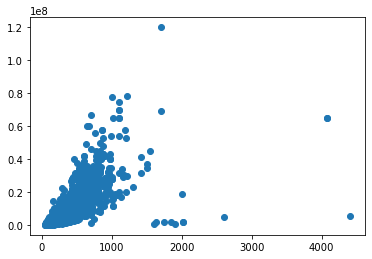

In [42]:
plt.scatter(x2, y2)

In [43]:
#Export file
new_clean04.to_csv('cleaned_df_mty.csv')

# MODEL1 - SINGLE VARIABLE
### builded_squared_meters

In [44]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = new_clean04["builded_squared_meters"].values.reshape(-1, 1)
y = new_clean04["price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (3538, 1) (3538, 1)


Text(0, 0.5, 'price')

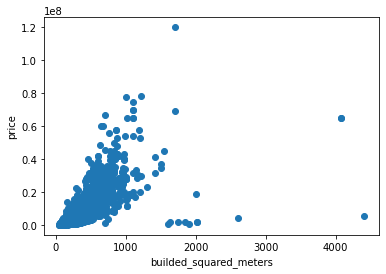

In [45]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("builded_squared_meters")
plt.ylabel("price")
### END SOLUTION

In [46]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [47]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [48]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [49]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 40093357957526.86
R-squared (R2 ): 0.6045284378483486


In [50]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.6045284378483486

In [51]:
with open('model04.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [52]:
with open('model04.pkl', 'rb') as fid:
    housemodel = pickle.load(fid)
    print(type(housemodel))
    print(housemodel.predict([[400]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[9370143.939913]]


# MODEL 2 - MULTIVARIABLE
### squared_meters, builded_squared_meters

In [53]:
# Assign the data to X10 and y10

X10 = new_clean04[["squared_meters", "builded_squared_meters"]]
y10 = new_clean04["price"].values.reshape(-1, 1)
print(X10.shape, y10.shape)

(3538, 2) (3538, 1)


In [54]:
# Use train_test_split to create training and testing data

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, random_state=42)

### END SOLUTION

In [55]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
### END SOLUTION

In [56]:
# Fit the model to the training data and calculate the scores for the training and testing data
# Fitting our model with all of our features in X
model2.fit(X_train10, y_train10)
training_score10 = model2.score(X_train10, y_train10)
testing_score10 = model2.score(X_test10, y_test10)

print(f"Training Score: {training_score10}")
print(f"Testing Score: {testing_score10}")

Training Score: 0.5430593300177013
Testing Score: 0.6202626152659121


Text(0.5, 1.0, 'Residual Plot')

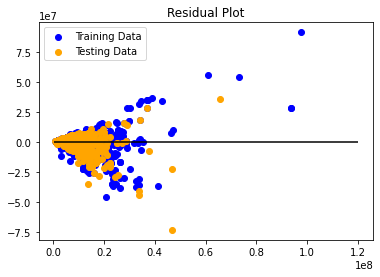

In [57]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model2.predict(X_train10), model2.predict(X_train10) - y_train10, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test10), model2.predict(X_test10) - y_test10, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [58]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted2 = model2.predict(X_test10)

# Score the predictions with mse and r2
mse_2 = mean_squared_error(y_test10, predicted2)
r2_2 = r2_score(y_test10, predicted2)

print(f"Mean Squared Error (MSE): {mse_2}")
print(f"R-squared (R2 ): {r2_2}")

### END SOLUTION

Mean Squared Error (MSE): 38498209108043.46
R-squared (R2 ): 0.6202626152659121


In [59]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model2.score(X_test10, y_test10)
### END SOLUTION

0.6202626152659121

In [60]:
with open('model05.pkl', 'wb') as fid:
    pickle.dump(model2, fid)

In [61]:
with open('model05.pkl', 'rb') as fid:
    housemodel2 = pickle.load(fid)
    print(type(housemodel2))
    print(housemodel2.predict([[400,500]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[11345163.85643173]]


# MODEL3 - MULTIVARIABLE

In [62]:
# Assign the data to X10 and y10

X20 = new_clean04[["builded_squared_meters", "squared_meters", "id_city"]]
y20 = new_clean04["price"].values.reshape(-1, 1)
print(X20.shape, y20.shape)

(3538, 3) (3538, 1)


In [63]:
# Use train_test_split to create training and testing data

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, random_state=42)

### END SOLUTION

In [64]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
### END SOLUTION

In [65]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model3.fit(X_train20, y_train20)

### END SOLUTION

LinearRegression()

In [66]:
# Fit the model to the training data and calculate the scores for the training and testing data
# Fitting our model with all of our features in X
training_score20 = model3.score(X_train20, y_train20)
testing_score20 = model3.score(X_test20, y_test20)

print(f"Training Score: {training_score20}")
print(f"Testing Score: {testing_score20}")

Training Score: 0.6002825606185989
Testing Score: 0.6636058867508867


Text(0.5, 1.0, 'Residual Plot')

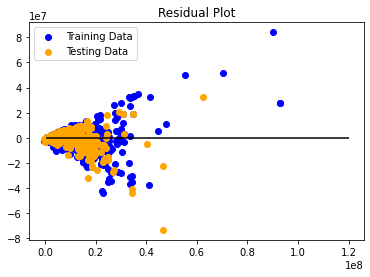

In [67]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model3.predict(X_train20), model3.predict(X_train20) - y_train20, c="blue", label="Training Data")
plt.scatter(model3.predict(X_test20), model3.predict(X_test20) - y_test20, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y20.min(), xmax=y20.max())
plt.title("Residual Plot")
### END SOLUTION

In [68]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted3 = model3.predict(X_test20)

# Score the predictions with mse and r2
mse_3 = mean_squared_error(y_test20, predicted3)
r2_3 = r2_score(y_test20, predicted3)

print(f"Mean Squared Error (MSE): {mse_3}")
print(f"R-squared (R2 ): {r2_3}")

### END SOLUTION

Mean Squared Error (MSE): 34104018817235.73
R-squared (R2 ): 0.6636058867508867


In [69]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model3.score(X_test20, y_test20)
### END SOLUTION

0.6636058867508867

In [70]:
with open('model06.pkl', 'wb') as fid:
    pickle.dump(model3, fid)

In [71]:
with open('model06.pkl', 'rb') as fid:
    housemodel3 = pickle.load(fid)
    print(type(housemodel3))
    print(housemodel3.predict([[400,500,14]]))

<class 'sklearn.linear_model._base.LinearRegression'>
[[803739.16974233]]


In [72]:
#End of notebook